# Problem Set 2 (93 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

## Submatrices (bonus).


Let $U$ be an $n \times r$ orthogonal matrix, $n \geq r$. It is well known, that such matrix has $r \times r$ non-singular submatrix $\hat{U}$. To measure ``non-singularity'' of this submatrix one can use the minimal singular value, or the norm of the inverse $\Vert \hat{U}^{-1} \Vert.$

Suppose we select the submatrix that has the smallest possible norm of the inverse among all $r \times r$ submatrices of $U$. What is the maximal value of such norm? Mathematically, we need to estimate

$$t(n, r) = \max_U \min_{\hat{U}} \Vert \hat{U}^{-1} \Vert_2.$$

Is it true that $t(n, r) \leq \sqrt{n}$?




# Problem 1 (QR algorithm) (22 pts)

One of the way to find eigenvalues for real matrix $A$ of size $(n,n)$ is **QR algorithm**. Each iteration of the algorithm consists of two main steps:

1. Compute QR decompostion $A_k = Q_kR_k$
2. Compute new matrix $A_{k+1} = R_kQ_k$

$A_0 = A$

From lecture materials you have seen that algorithm complexity in general is $O(Nn^3)$ ($N$ - number of iterations). But we can make an improvement by transforming matrix to **Upper Hessenberg form** ([link](https://en.wikipedia.org/wiki/Hessenberg_matrix)) before running the algorithm. 

The good property of Hessenberg matrix is preservation of its structure during QR algorithm iteration. In other words, if $A_{k}$ is Hessenberg matrix, then $A_{k+1}$ will also be a Hessenberg matrix. We can use this property to reduce complexity of each iteration. Since we need only to zero first lower subdiagonal for QR factorization (first step in each iteration) we can use **Givens rotations** $O(n^2)$ instead of **Householder reflections** $O(n^3)$. Now, the last question is how to obtain Hessenberg matrix - use Householder reflections. Since it is done only once (initialization stage), complexity of algorithm will not be increased.

Final algorithm:

I. **Initialization**

> - Transform original matrix $A$ to Hessenberg form $H_0 = U^TAU$ using Householder reflections.

II. **Loop**

> **for** k in range(**N**):
> -  Compute QR using Givens rotation: such matrices $Q_k,R_k$ that $H_k = Q_kR_k$

> - Update matrix $H_{k+1} = R_k Q_k$



## What do you need to do:
### Theoretical part
<!-- 1. For real square metrices $Q,A,\hat{A}$ prove that if we have relation $A = Q^T\hat{A}Q$ ($Q$ - orthogonal matrix) then eigenvalues of $A$ and $\hat{A}$ are equal. **(3 pts)**
2. Suppose we factorize real square matrix $A = Q^TTQ$, where $Q$ is orthogonal and $T$ is upper/lower triangular matrix. Describe the easiest way to find eigenvalues of $A$. **(2 pts)** -->
1. Show that Hessenberg matrix preserves its structure under QR algorithm: if $A_k$ hessenberg matrix then $A_{k+1}$ hessenberg as well. **(5 pts)**

2. **(Bonus task)** For real square matrix $A$, which all leading minors are nondegenerate, prove that QR algorithm converges to upper triangular matrix: $\lim\limits_{k\rightarrow \infty} A_k = T$, where $T$ - upper triangular matrix.

### Practical part

1. Implement function **Hessenberg_Transform** which takes a real square matrix $A$ and returns transformed matrix in Hessenberg form $H$ (use householder reflections). **(5 pts)**

2. Implement function **QR_givens** which takes a real square matrix in Hessenberg form $H$ and returns QR factorization: matrices $Q$ and $R$. **(5 pts)**

3. Implement function **QR_algorithm**, which takes a real square matrix $A$ and returns $H_{N}$ - the result of $N$ iterations of QR algorithm. Use previously implemented **Hessenberg_Transform** to get Hessenberg form of matrix $A$, and  **QR_givens** to make QR factorization on each iteration. **(2 pts)**

4. Varing parameter $n$ generate random matrix of size $(n,n)$ and measure the computation time of **QR_algorithm** function. Plot observed data: computation time versus $n$. Use logarithmic scale for both axes. Explain obtained results.**(3 pts)**

5. Compare eigenvalues computed using your implemented algorithm and standard numpy functionality for some random matrix. Try different number of iterations for the algorithm. Explain results. **(2 pts)**

### Theoretical proofs

Let's prove it by induction. 
Base of induction - $A_0$ is Hessenberg.

Suppose it is true for $k$ from 0 to $K$ (that matrix $A_k$ is upper-Hessenberg). Let's prove it for $k = K + 1$. Let's apply Givens rotations to matrix $A_k$, we will need $n - 1$ rotations(even if the element under the main diagonal is zero, we apply identity transformation, which is Givens too). So, 

$$
G_{n-1}...G_1A_k = R
$$

To get the QR decomposition we should multiply both sides by $G_{1}^T...G_{n-1}^T$ (using the orthogonality property).

$$
A_k = QR = G_{1}^T...G_{n-1}^TR
$$

$$
A_{k+1} = RQ = RG_{1}^T...G_{n-1}^T = (G_{n-1}...G_1R^T)^T
$$

$R^T$ is lower-triangular. $G_1$ affects only on submatrix $R^T[1:3, :]$ (first two rows). So, we may get the element $R^T_{12}$ nonzero. $G_2$ affects on $R^T[2:4, :]$, $R^T_{23}$ may become nonzero. Doing that till $G_{n-1}$ we get, that only the elements $R^T_{i, j}$ with $i-j=-1$ may become nonzero. So, $G_{n-1}...G_1R^T$ is lower-Hessenberg and $A_{k +1} = (G_{n-1}...G_1R^T)^T $ is upper-Hessenberg.


In [9]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt


In [10]:
def Hessenberg_Transform(A):
  H = np.copy(A).astype(float)
  for k in range(len(H) - 2):
    x = H[k + 1:, k]
    x = x.reshape((len(x), 1))
    vk = np.sign(x[0]) * np.linalg.norm(x, 2) * np.eye(len(x), 1) + x
    vk = vk / np.linalg.norm(vk, 2)
    P = np.eye(len(x)) - 2 * np.dot(vk, vk.T)
    H[k+1:, k:] = np.dot(P, H[k+1:, k:])
    H[:, k+1:] = np.dot(H[:, k+1:], P)
  return H

In [11]:
def givens_rotation(a, b):
  if np.isclose(b, 0, atol=1e-8):
    return 1, 0
  else:
    if np.abs(b) > np.abs(a):
      t = - a / b
      s = 1 / np.sqrt(1 + t ** 2)
      return s * t, s
    else:
      t = - b / a
      c = 1 / np.sqrt(1 + t ** 2)
      return c, c * t

def QR_givens(H):
  Q = np.eye(len(H))
  R = H
  for k in range(len(H) - 1):
    c, s = givens_rotation(R[k, k], R[k + 1, k])
    R[k, :], R[k + 1, :] = c * R[k, :] - s * R[k + 1, :], s * R[k, :] + c * R[k + 1, :]
    Q[:, k], Q[:, k + 1] = c * Q[:, k] - s * Q[:, k + 1], s * Q[:, k] + c * Q[:, k + 1]
  return Q,R

In [12]:
def QR_algorithm(A, N_iterations):
  H = Hessenberg_Transform(A)
  for _ in range(N_iterations):
    Q, R = QR_givens(H)
    H = np.dot(R, Q)
  return H

In [13]:
from tqdm import tqdm

In [135]:
import time

times = []
sizes = np.arange(50, 1001, 50)
for size in tqdm(sizes):
    matrix = np.random.randn(size, size)
    start_time_ns = time.process_time_ns()
    QR_algorithm(matrix, 100)
    end_time_ns = time.process_time_ns()
    timer_ns = end_time_ns - start_time_ns
    #time1 = %timeit -o QR_algorithm(matrix, 100)
    times.append(timer_ns)

100%|██████████| 20/20 [03:14<00:00,  9.75s/it]


$T \sim n^m$, consequently, $\log(T) \sim m\log(n)$, so let's plot the graph in log scale

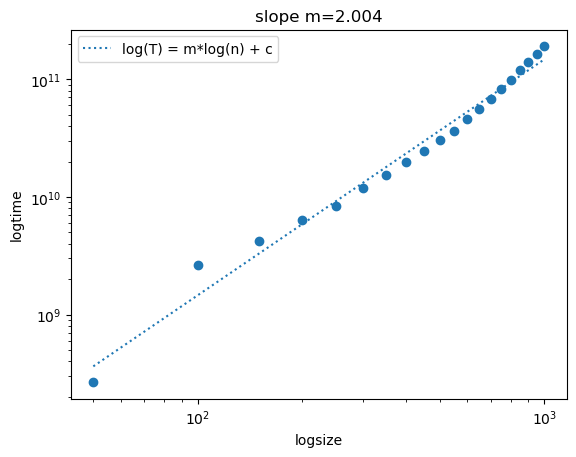

In [136]:
plt.scatter(sizes, times)


m, c = np.polyfit(np.log(sizes), np.log(times), 1) # fit log(y) = m*log(x) + c
y_fit = np.exp(m*np.log(sizes) + c) # calculate the fitted values of y 
plt.plot(sizes, y_fit, ':', label='log(T) = m*log(n) + c')

plt.xlabel("logsize")
plt.ylabel("logtime")
plt.xscale('log')
plt.yscale('log')
plt.title(f'slope m={m:.3f}')
plt.legend();

The plot we got is not a straight line, but in average the slope is 2. It is strange, that the plot has a breaking point at sizes of matrices $\approx$ 75 (or just high curvature).

# eigenvalues

Since we only need to test the case of real spectrum, let's make the matrix symmetric. We will test 4 sizes: 10, 20, 30, 40, and different number of iterations, 10, 100, 1000, 10000. 

In [16]:
sizes = np.arange(10, 41, 10)
for size in sizes:
    print(size)
    A = np.random.randn(size, size)
    A = 0.5 * (A + A.T)
    eigs, vecs = np.linalg.eig(A)
    eigenvalues_np = np.array(sorted(eigs, key = lambda x: -np.abs(x)))
    eig_10 = np.array(sorted(np.diag(QR_algorithm(A, 10)), key = lambda x: -np.abs(x)))
    eig_100 = np.array(sorted(np.diag(QR_algorithm(A, 100)), key = lambda x: -np.abs(x)))
    eig_1000 = np.array(sorted(np.diag(QR_algorithm(A, 1000)), key = lambda x: -np.abs(x)))
    eig_10000 = np.array(sorted(np.diag(QR_algorithm(A, 10000)), key = lambda x: -np.abs(x)))
    #errors = np.array([np.abs(eigenvalues_np - eig_10).max(), np.abs(eigenvalues_np - eig_100).max(), np.abs(eigenvalues_np - eig_1000).max(), np.abs(eigenvalues_np - eig_10000).max()])
    errors = np.array([(np.abs(eigenvalues_np - eig_10) / np.abs(eigenvalues_np)).max(), (np.abs(eigenvalues_np - eig_100) / np.abs(eigenvalues_np)).max(), (np.abs(eigenvalues_np - eig_1000) / np.abs(eigenvalues_np)).max(), (np.abs(eigenvalues_np - eig_10000) / np.abs(eigenvalues_np)).max()])
    print(errors)

10
[1.85170370e+00 1.93748143e-02 4.96025339e-14 4.96025339e-14]
20
[1.85288096e+00 4.92879409e-02 8.98205703e-10 1.18964490e-13]
30
[1.59641881e+00 1.94112991e+00 3.74509151e-04 3.66698717e-13]
40
[1.85940544e+00 1.97112814e+00 1.46295250e-05 2.46737997e-13]


It takes a lot of steps for the QR algorithm to converge. 

# Problem 2 (Stochastic trace estimation) (30 pts) 

In this problem we consider stochastic estimation of trace for implicitly-defined matrices.

Impicitly-defined matrices are such that matrix-vector multiplication is easy to perform, but matrix entries are not easy to obtain (examples are given by integral kernels, products of sparse matrices, products of a set of circulants, low-rank matrices given in a compressed form, etc).

In such cases it is often possible to approximate trace with $k\ll N$ matrix-vector products, where $N$ is the size of matrix.

One popular way to obtain stochastic estimate is Hutchinson algorithm.

## Hutchinson algorithm
Let $u$ be a random vector from $\mathbb{R}^{n}$ with independent identicaly distributed entries $u_i$ each having zero mean and variance $\sigma^2$.

Let $B$ be a symmetric matrix from $\mathbb{R}^{n\times n}$.

Hutchinson algorithm is roughly as follows:

    trace_estimate = 0
    for i=1:N do
        u = random_vector
        trace_estimate += (u,Bu)
    end do
    trace_estimate /= N

So Hutchinson algorithm uses empirical mean $u^\top B u$ as a trace estimation. Below we ask you to find properties of this estimator.

**Subproblem 1 (5 pts)**

1. Show that $\mathbb{E}\left[u^\top B u\right] = \sigma^2 \text{tr} B$, where $\mathbb{E}\left[\cdot\right]$ denotes average wrt $u$.

First of all, let's 

$$
\mathbb{E}\left[u^TBu\right] = \mathbb{E}\left[\sum_{i, j}u_iB_{ij}u_j\right] = \sum_{i, j}B_{ij}\mathbb{E}\left[u_iu_j\right]
$$

If $i\neq j$, $\mathbb{E}[u_iu_j]=\mathbb{E}[u_i]\mathbb{E}[u_j] = 0$, since they are independent. If $i = j$, then $\mathbb{E}[u^2]=\text{var}[u] + \mathbb{E}[u]^2 = \text{var}[u] = \sigma^2$. Finally, rewriting the sum:

$$
\sum_{i, j}B_{ij}\mathbb{E}\left[u_iu_j\right] = \sum_{i \neq j}B_{ij}\mathbb{E}\left[u_iu_j\right] + \sum_{i = j}B_{ij}\mathbb{E}\left[u_iu_j\right] = \sum_{i = j}B_{ij}\sigma^2 = \sigma^2\text{Tr}B
$$

2. Show that $\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}B_{ii}^2$, where $\text{var}$ denotes [variance](https://en.wikipedia.org/wiki/Variance).

$$
\text{var}[u^tBu] = \mathbb{E}[(u^TBu)^2] - \mathbb{E}[(u^TBu)]^2
$$

We've already calculated the last term on previuos step. Now we concentrate on the first one:

$$
\mathbb{E}[(u^TBu)^2] = \mathbb{E}\left[\sum_{i,j}\sum_{k,l}u_{i}B_{ij}u_{j}u_{k}B_{kl}u_{l}\right] = \sum_{i,j}\sum_{k,l}B_{ij}B_{kl}\mathbb{E}\left[u_{i}u_{j}u_{k}u_{l}\right]
$$

If $i = j = k = l$, then $\mathbb{E}\left[u_{i}u_{j}u_{k}u_{l}\right] = \mathbb{E}\left[u^4\right]$. If $i = j = k$, but $k \neq l$ (and other similar permutations of indeces), we get $\mathbb{E}\left[u_{i}u_{j}u_{k}u_{l}\right] = \mathbb{E}[u^3]\mathbb{E}[u] = 0$. If $i = j$, $k = l$, but $i \neq k$ (again, with all permutations), then $\mathbb{E}\left[u_{i}u_{j}u_{k}u_{l}\right] = \mathbb{E}\left[u^2\right]\mathbb{E}\left[u^2\right] = \text{var}[u]^2 = \sigma^4$. Last but not least is when all indices are different, but since the variables are independent, the mean is zero. 

$$
\sum_{i,j}\sum_{k,l}B_{ij}B_{kl}\mathbb{E}\left[u_{i}u_{j}u_{k}u_{l}\right] = \sum_{i}B_{ii}^2\mathbb{E}\left[u^4\right] + \sum_{i\neq j}B_{ii}B_{jj}\sigma^4+\sum_{i\neq j}B_{ij}^2\sigma^4+\sum_{i\neq j}B_{ij}B_{ji}\sigma^4 = \sum_{i}B_{ii}^2\mathbb{E}\left[u^4\right] + \sum_{i\neq j}B_{ii}B_{jj}\sigma^4+2\sum_{i\neq j}B_{ij}^2\sigma^4
$$

We also used that $B = B^T$.

$$
\mathbb{E}[(u^TBu)]^2 = \sigma^4\left(\sum_iB_{ii}\right)^2=\sigma^4\sum_{i, j}B_{ii}B_{jj}
$$

Finally, collecting all together, we get:

$$
\text{var}[u^tBu] = 2\sigma^4\sum_{i\neq j}B_{ij}^2+\left(\mathbb{E}[u^4]-\sigma^4\right)\sum_{i}B_{ii}^2
$$

3. Find the variance for the case when:

  a. each $u_{i}\sim \mathcal{N}(0, \sigma^2)$, i.e., for normally distributed with zero mean and variance $\sigma^2$;

  b. each $u_{i}$ follows [Rademacher distribution](https://en.wikipedia.org/wiki/Rademacher_distribution);

**a**

All we need to do is compute $\mathbb{E}[u^4]$. Let's start with normal distribution. 

$$
\rho(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}
$$

$$
\mathbb{E}[u^4] = \int_{-\infty}^{\infty}\frac{x^4}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}dx = \frac{4\sigma^4}{\sqrt{\pi}}\int_{-\infty}^{\infty}t^4e^{-t^2}dt
$$

Here we changed the variable $t = \frac{x}{\sqrt{2\sigma^2}}$. Taking this integral by parts twice (first $u = t^3$, $dv = te^{-t^2}$, second $u = t$, $dv = te^{-t^2}$), we arrive to a well-known integral 

$$
\frac{4\sigma^4}{\sqrt{\pi}}\int_{-\infty}^{\infty}t^4e^{-t^2}dt = \frac{3\sigma^4}{\sqrt{\pi}}\int_{-\infty}^{\infty}e^{-t^2}dt = 3\sigma^4
$$

The formula reduces to 
$$
\text{var}[u^tBu] = 2\sigma^4\sum_{i, j}B_{ij}^2 = 2\sigma^4\|B\|_F^2
$$

**b**

Rademacher distribution is $\mathbb{P}(u = \sigma) = 0.5$ and $\mathbb{P}(u = -\sigma) = 0.5$. 

$$
\mathbb{E}[u^4] = (\sigma)^4\frac{1}{2} + (-\sigma)^4\frac{1}{2} = \sigma^4
$$

$$
\text{var}[u^tBu] = 2\sigma^4\sum_{i \neq j}B_{ij}^2
$$

4. Why variance matters.
  
  Let $z_1, \dots, z_N$ are independent identicaly distributed samples of random variable with mean $\mu$ and variance $\sigma^2$ and $\hat{\mu} = \frac{1}{N}\sum_{i=1}^{N} z_{i}$ is a standard Monte Carlo extimator for mean.

  a. Show that $\mathbb{E}\left[\hat{\mu}\right] = \mu$ and $\text{var}\left[\hat{\mu}\right] = \sigma^2 \big/ N$.

  b. Use [Chebyshev inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality) to find the number of samples $N$ you need to use to guarante that estimate $\hat{\mu}$ deviates from $\mu$ on $\epsilon\ll 1$ with probability at most $\delta\ll 1$.

**a**

$$
\mathbb{E}\left[\hat{\mu}\right] = \mathbb{E}\left[\frac{1}{N}\sum_{i = 1}^Nz_i\right] = \frac{1}{N}\sum_{i = 1}^N\mathbb{E}\left[z_i\right] = \mu
$$

$$
\text{var}[\hat{\mu}] = \mathbb{E}\left[\hat{\mu}^2\right] - \mathbb{E}\left[\hat{\mu}\right]^2 = \mathbb{E}\left[\hat{\mu}^2\right] - \mu^2
$$

$$
\mathbb{E}\left[\hat{\mu}^2\right] = \frac{1}{N^2}\sum_{i}\sum_{j}\mathbb{E}\left[z_iz_j\right] = \frac{1}{N^2}\sum_{i}\mathbb{E}\left[z_i^2\right] + \frac{1}{N^2}\sum_{i\neq j}\mathbb{E}\left[z_iz_j\right]
$$

$\sigma^2 = \text{var}[z_i] = \mathbb{E}[z_i^2] - \mathbb{E}[z_i]^2 = \mathbb{E}[z_i^2] + \mu^2$, $\mathbb{E}\left[z_iz_j\right] = \mathbb{E}\left[z_i\right]\mathbb{E}\left[z_j\right] = \mu^2$ if $i \neq j$, so substituting this into the equation above

$$
\frac{1}{N^2}\sum_{i}\mathbb{E}\left[z_i^2\right] + \frac{1}{N^2}\sum_{i\neq j}\mathbb{E}\left[z_iz_j\right] = 
\frac{1}{N^2}\sum_{i}(\sigma^2 + \mu^2) + \frac{1}{N^2}\sum_{i\neq j}\mu^2 = \frac{\sigma^2 + \mu^2}{N} + \frac{N - 1}{N}\mu^2 = \frac{\sigma^2}{N} + \mu^2
$$

$$
\mathbb{E}\left[\hat{\mu}^2\right] - \mu^2 = \frac{\sigma^2}{N}
$$

**b**

$$
\mathbb{P}(|X - \mu| \geq k\frac{\sigma}{\sqrt{N}}) \leq \frac{1}{k^2} = \delta
$$

$$
\varepsilon = k\frac{\sigma}{\sqrt{N}} \hspace{10dd} \Rightarrow \hspace{10dd} N = \frac{\sigma^2}{\varepsilon^2\delta}
$$

5. Does the variance of the estimator matters?

  a. Adapt bounds from _Subproblem 1 point 4.b_ for Hutchinson algorithm with normal and Rademacher distributions.

  b. Empirically evaluate variances from _Subproblem 1 point 2_ using several sparse, low-rank and circulant matrices.

  c. Comment on practicality of Chebyshev bounds. What is the number of iterations you need to perform to achieve reasonably small error with reasonably large probability according to this bound?

Denote Hutchinson's estimator as $H_N = \frac{1}{N}\sum_{i=1}^Nu_i^TBu_i$. Since all the terms are iid, we can use result of subproblem 4a. 

$$
\mathbb{E}[u_1^TBu_1] = \sigma^2 \text{Tr}(B)
$$

For variance

$$
\text{var}[u_1^TBu_1] = 2\sigma^4\sum_{i\neq j}B_{ij}^2+\left(\mathbb{E}[u^4]-\sigma^4\right)\sum_{i}B_{ii}^2
$$

Hence, for Gaussian (using subproblem 3a):

$$
\text{var}[H_N] = 2\sigma^4\|B\|_F^2
$$

For Rademacher

$$
\text{var}[H_N] = 2\sigma^4\sum_{i \neq j}B_{ij}^2
$$

Finally, for Gaussian

$$
\mathbb{P}(|H_N - \sigma^2\text{Tr}(B)| \geq \varepsilon\text{Tr}(B)) \leq  \delta
$$

$$
N_G = \frac{2\|B\|_F^2}{\delta\varepsilon^2\text{Tr}^2(B)}
$$

Answer for Rademacher is not that neat

$$
N_R = \frac{2\sum_{i \neq j}B_{ij}^2}{\delta\varepsilon^2\text{Tr}^2(B)}
$$

# random sparse

In [162]:
from scipy import sparse

In [232]:
A = sparse.rand(100, 100, density = 0.01)
A = sparse.coo_matrix.todense(A)
A = (A + A.T) / 2
A_F = np.trace(np.dot(A.T, A))
A_F

17.63878496573738

In [234]:
for deviation in range(3, 11):
    exp = 0.0
    exp2 = 0.0
    for i in range(1, 10001):
        u = np.random.normal(0, deviation, size=(A.shape[0], 1))
        prod = np.dot(u.T, np.dot(A, u))[0, 0]
        exp += prod
        exp2 += prod ** 2

    experimental = exp2 / i - (exp / i)**2
    #print(experimental)
    print((experimental / (2 * A_F))**0.25, deviation , (experimental / (2 * A_F))**0.25 / deviation)

3.0146978432933884 3 1.0048992810977961
4.020691484157768 4 1.005172871039442
4.961069569641665 5 0.9922139139283329
5.995396154343761 6 0.9992326923906268
6.960686562353453 7 0.9943837946219218
7.970247086835306 8 0.9962808858544132
9.020219650440884 9 1.002246627826765
10.047038858030813 10 1.0047038858030812


# low-rank matrix

In [235]:
x = 5 * np.random.rand(100, 1)
B = np.dot(x, x.T)
B = (B + B.T)/2
B_F = np.trace(np.dot(B.T, B))
B_F

712293.8908862605

In [236]:
for deviation in range(3, 11):
    exp = 0.0
    exp2 = 0.0
    for i in range(1, 10001):
        u = np.random.normal(0, deviation, size=(B.shape[0], 1))
        exp += np.dot(u.T, np.dot(B, u))[0, 0]
        exp2 += np.dot(u.T, np.dot(B, u))[0, 0] ** 2
    experimental = exp2 / i - (exp / i)**2
    #print(experimental)
    print((experimental / (2 * B_F))**0.25, deviation, (experimental / (2 * B_F))**0.25 / deviation)
    print()

2.9925458779823795 3 0.9975152926607932

3.9318444344366323 4 0.9829611086091581

4.994629344683335 5 0.998925868936667

5.905987310432003 6 0.9843312184053339

6.940935886077904 7 0.9915622694397006

8.102287165620057 8 1.012785895702507

8.88293633673294 9 0.9869929263036599

9.954334481561759 10 0.9954334481561758



# circulant matrix

In [237]:
C = scipy.linalg.circulant((5 * np.random.rand(100))).astype(int)
C = (C + C.T)/2
C_F = np.trace(np.dot(C.T, C))
C_F

50800.0

In [238]:
exp = 0.0
exp2 = 0.0
for deviation in range(3, 11):
    exp = 0.0
    exp2 = 0.0
    for i in range(1, 10001):
        u = np.random.normal(0, deviation, size=(C.shape[0], 1))
        exp += np.dot(u.T, np.dot(C, u))[0, 0]
        exp2 += np.dot(u.T, np.dot(C, u))[0, 0] ** 2
    experimental = exp2 / i - (exp / i) ** 2
    #print(experimental)
    print((experimental / (2 * C_F))**0.25, deviation, (experimental / (2 * C_F))**0.25 / deviation)

2.976872240000304 3 0.992290746666768
3.9907479109575017 4 0.9976869777393754
5.040435403348925 5 1.008087080669785
5.897159283009247 6 0.9828598805015413
6.947498719565979 7 0.9924998170808541
7.865517478364575 8 0.9831896847955719
9.160307900809604 9 1.0178119889788448
10.009320441387574 10 1.0009320441387575


So, the formula works.

# Chebyshev bounds

The relation between number of steps in Hutchinson and $\varepsilon$, $\delta$ is

$$
N\sim \frac{1}{\varepsilon^2\delta}
$$

So it grows very fast when $\varepsilon$, $\delta$ are going to zero. On the other side, Chebyshev bounds are very rough, so we probably won't need to do that much steps to get desired result.

**Subproblem 2 (5 pts)**

  1. Implement Hutchinson algorithm for normal and Rademacher distributions.

In [39]:
def hutchinson_normal(mat, N):
    trace = 0
    for i in range(N):
        u = np.random.normal(0, 1, size=(mat.shape[0], 1))
        trace += np.dot(u.T, np.dot(mat, u))
    return trace[0, 0] / N


def hutchinson_rademacher(mat, N):
    trace = 0
    for i in range(N):
        u = (np.random.rand(mat.shape[0], 1) < 0.5) * 2 - 1
        trace += np.dot(u.T, np.dot(mat, u))
    return trace[0, 0] / N

2. Evaluate your algorithm on several matrices on your choice.

In [ ]:
mat1 = np.ones((100, 100))
for i in range(10):
    print(hutchinson_normal(mat1, 10), hutchinson_rademacher(mat1, 10), np.trace(mat1))

72.44639872560373 60.0 100.0
155.61674002717922 13.6 100.0
79.89856829597186 84.4 100.0
120.16367627852551 143.6 100.0
32.75920731146057 132.4 100.0
217.9844473771779 128.4 100.0
80.37952768361569 53.2 100.0
88.3135778091533 92.4 100.0
147.69757078256936 33.2 100.0
24.73687884721106 116.4 100.0


In [72]:
mat2 = np.random.rand(100, 100)
mat2 = (mat2 + mat2.T)/2
for i in range(10):
    print(hutchinson_normal(mat2, 10), hutchinson_rademacher(mat2, 10), np.trace(mat2))

75.38040530620893 89.97443384721153 51.54869697496116
42.90016262290011 50.69864137067832 51.54869697496116
48.66834543604374 72.24370927370202 51.54869697496116
77.22912222177955 35.55457853551716 51.54869697496116
35.74949966688622 51.01189652427401 51.54869697496116
20.77417777560027 31.879353779322564 51.54869697496116
39.19525323899937 14.08150147579791 51.54869697496116
37.21558198944662 57.66714020362273 51.54869697496116
48.112763507446445 44.84700991583561 51.54869697496116
102.39833285671077 73.63583369410426 51.54869697496116


In [46]:
from scipy.linalg import hilbert

In [ ]:
mat3 = hilbert(100)
for i in range(10):
    print(hutchinson_normal(mat3, 10), hutchinson_rademacher(mat3, 10), np.trace(mat3))

2.743949481057792 2.796484154881628 3.2843421893016345
5.512954950453915 2.190605764993324 3.2843421893016345
3.223055821263924 4.463577500568677 3.2843421893016345
2.3608728397639096 1.5863225887254084 3.2843421893016345
1.6091393608727393 2.98770107808753 3.2843421893016345
4.6803731341428465 2.2942986703991006 3.2843421893016345
2.881274328486679 3.1787403083283072 3.2843421893016345
3.4399446216288347 4.230147310451629 3.2843421893016345
3.3232074912440246 5.713782155665532 3.2843421893016345
3.390733173724782 2.926274346017636 3.2843421893016345


**Subproblem 3 (5 pts)**

Is it possible to obtain better bound? Here we study how to do that for simplified case.

Let $A$ be the $N\times N$ matrix with all entries equal one, i.e., $A_{ij}=1$. We consider variant of Hutchinson algorithm with standard normal variables, i.e., $u_{i} \sim \mathcal{N}(0, 1)$.


1. Show that $u^\top A u \big/ N$ has [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution).

$$
\frac{u^TAu}{N}=\frac{1}{N}\sum_{i,j}u_iA_{ij}u_j = \frac{1}{N}\sum_{i,j}u_iu_j = \frac{1}{N}\left(\sum_iu_i\right)\left(\sum_ju_j\right)
$$

Sum of independent normal distibuted variables is a normal distributed variable with a variance equal to sum of variances, and mean is sum of means of terms. So, $\sum_iu_i\sim \mathcal{N}(0, N)$. Let's denote it as $U$. Since variance of $U$ is $N$, random variable $\frac{U}{\sqrt{N}}\sim\mathcal{N}(0, 1)$.

$$
\frac{u^TAu}{N}=\frac{U^2}{N} = \frac{U}{\sqrt{N}}\frac{U}{\sqrt{N}} 
$$

So, it is a square of standard normally distributed variable, i.e. it is chi-squared.

2. Suppose that Hutchinson algorithm is applied for $M$ iteration. Show that $\sum_{i=1}^{M}u_i^\top A u_i \big/ N$ has $\chi^2(M)$ distribution (chi-squared distribution with $M$ degrees of freedom).

From previous task we got, that $\frac{u^TAu}{N}=U^2$, where $U\sim \mathcal{N}(0, 1)$.

$$
\sum_{i=1}^M\frac{u_i^TAu_i}{N} = \sum_{i=1}^MU_i^2 = \chi^2(M), \hspace{15dd} U_i\sim\mathcal{N}(0, 1)
$$

3. Let $M\geq50$, $G_{M} = \sum_{i=1}^{M}u_i^\top A u_i \big/ N$ and suppose that $\chi^2(M)$ has approximately normal distribution. Under this assumptions show that there exists small $\delta$ such that $\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) \geq 1 - \delta $.

$$
\text{Tr}(A) = N, \ \ \ \|A\|_F^2 = N^2
$$

From previous tasks we know, that $\mathbb{E}[G_M]=\frac{M}{N}\text{Tr}(A)=M$ and $\text{var}[G_M]=\frac{2\|A\|_F^2M}{N^2}=2M$. Since chi-squared is approximately normal, let's compute the following probability:

$$
\mathbb{P}(|G_M-\text{Tr}(A)|\leq\varepsilon\text{Tr}(A))=\mathbb{P}(|G_M-N|\leq\varepsilon N)=\mathbb{P}((1-\varepsilon)N\leq G_M\leq(1+\varepsilon)N)=
$$
$$
=\int_{(1-\varepsilon)N}^{(1+\varepsilon)N}\frac{1}{\sqrt{4\pi M}}\exp\left(-\frac{(x-M)^2}{4M}\right)dx
$$

Making the substitution $t=\frac{x-M}{2\sqrt{M}}$, $dt = \frac{dx}{2\sqrt{M}}$ (also do not forget to change integral limits):

$$
\int_{\frac{N - M - \varepsilon N}{2\sqrt{M}}}^{\frac{N - M + \varepsilon N}{2\sqrt{M}}}\frac{1}{\sqrt{\pi}}\exp\left(-t^2\right)dt
$$

Returning to initial problem, 

$$
1 - \delta \leq \int_{\frac{N - M - \varepsilon N}{2\sqrt{M}}}^{\frac{N - M + \varepsilon N}{2\sqrt{M}}}\frac{1}{\sqrt{\pi}}\exp\left(-t^2\right)dt \ \ \ \Rightarrow \ \ \ \delta\geq 1 - \int_{\frac{N - M - \varepsilon N}{2\sqrt{M}}}^{\frac{N - M + \varepsilon N}{2\sqrt{M}}}\frac{1}{\sqrt{\pi}}\exp\left(-t^2\right)dt
$$

So, we can take 

$$
\delta =  1 - \int_{\frac{N - M - \varepsilon N}{2\sqrt{M}}}^{\frac{N - M + \varepsilon N}{2\sqrt{M}}}\frac{1}{\sqrt{\pi}}\exp\left(-t^2\right)dt = 1 - \text{erf}\left(\frac{N - M + \varepsilon N}{2\sqrt{M}}\right) + \text{erf}\left(\frac{N - M - \varepsilon N}{2\sqrt{M}}\right)
$$

It is possible to generalize bound from Subproblem 3 point 3 and the result can be found in the paper by Avron and Toledo (2010).

---

Another similar bound that we state without a proof involves Frobenius norm.

For Hutchinson estimate with $l$ steps denoted $T_l$, $\delta \in (0, 1/2]$ for fixed constants $c$ and $C$

\begin{equation}
  \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\left\|A\right\|_{F}\right) \geq 1 - \delta.
\end{equation}

## Improved Hutchinson algorithms

There are a lot of improved version of Hutchinson algorithms.

One fruitful idea is to represent the matrix $A$ as a sum $A = A_1 + A_2$ in such a way that $A_1$ has easy-to-compute trace and $\left\|A_2\right\|_F^2 \ll \left\|A_1\right\|_F^2$ or $\text{tr}(A_2) \ll \text{tr}(A_1)$ if both $A_1$ and $A_2$ are spd matrices.

If this splitting is possible to construct, one has smaller one-sample variance or better $(\epsilon, \delta)$-estimator.

Below we ask you to prove simple theoretical result on the systematic construction of such splittings.

**Subproblem 4 (5 pts)**

Let $A\in\mathbb{R}^{N\times N}$ be symmetric positive definite matrix and $Q\in\mathbb{R}^{N\times k}$ contains $k$ eigenvalues corresponding to top $k$ eigenvalues, i.e., $\lambda_1 \leq \lambda_2\leq\dots\leq \lambda_k\leq\lambda_{k+1}\leq \dots \leq \lambda_{N}$ eigenvalues are ordered and $Q_{\star 1}, \dots Q_{\star k}$ are eigenvectors with eigenvalues $\lambda_{N-k},\dots,\lambda_{N}$.

1. Show that $\text{tr}\left(A\right) = \text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right)$.

---



Here we are going to use the trace property, that is $\text{Tr}(AB)=\text{Tr}(BA)$. 

$$
\text{Tr}\left(A\right) = \text{Tr}\left(Q^TAQ\right) + \text{Tr}\left((I-QQ^T)A(I-QQ^T)\right) 
$$

$$
\text{Tr}\left(A\right) = \text{Tr}\left(QQ^TA\right) + \text{Tr}\left(A - AQQ^T - QQ^TA + QQ^TAQQ^T\right) 
$$

$$
\text{Tr}\left(A\right) = \text{Tr}\left(QQ^TA\right) + \text{Tr}\left(A\right) - 2\text{Tr}\left(QQ^TA\right)+ \text{Tr}\left(QQ^TQQ^TA\right)
$$

$$
0 = \text{Tr}\left(QQ^TQQ^TA\right) - \text{Tr}\left(QQ^TA\right)
$$

So, if we prove, that $Q^TQ = I$, we will get the identity.

Suppose $v_1$ and $v_2$ are eigenvectors corresponding to eigenvalues $\lambda_1, \lambda_2$. 

$$
\lambda_1(v_1, v_2) = (Av_1, v_2) = (v_1, Av_2) = \lambda_2(v_1, v_2)
$$

So, it means that if matrix is symmetric, the eigenvectors, corresponding to different eigenvalues are orthogonal. In addition to this, we will orthogonalise the eigenvectors, corresponding to one eigenvalue, and normalize all the vectors. So, we can make $Q$ orthogonal, i.e. $Q^TQ = I_r$. Returning to traces we get the identity.

2. Show that $\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} \leq \frac{1}{\sqrt{k}}\text{tr}\left(A\right)$.

$$
(I - QQ^T)(I-QQ^T)=I-QQ^T-QQ^T+QQ^TQQ^T=I-QQ^T
$$

Since $A$ is psd, it accepts eigenvalue decomposition $A = V\Lambda V^T = \sum_{i=1}^N\lambda_iv_iv_i^T$, where $\Lambda = \text{diag}(\lambda_1, ..., \lambda_N)$ and columns of $V$ are its eigenvectors ($V$ is orthogonal). It is obvious, that last $k$ columns of $V$ is matrix $Q$.

$Q$ is composed from eigenvectors of $A$, so ($\Lambda_k=\text{diag}(\lambda_{N-k+1},...,\lambda_N)$):

$$
AQ=Q\Lambda_k
$$

Since $A$ and $I-QQ^T$ are symmetric

$$
\|(I- QQ^T)A(I- QQ^T)\|_F^2=\text{Tr}((I- QQ^T)A(I- QQ^T)(I- QQ^T)A(I- QQ^T))=\text{Tr}(A(I- QQ^T)(I- QQ^T)A(I- QQ^T)(I- QQ^T))=
$$
$$
=\text{Tr}(A(I- QQ^T)A(I- QQ^T))=\|A(I-QQ^T)\|_F^2=\|A-Q\Lambda_kQ^T\|_F^2 = \|A-A_k\|_F^2
$$

$$
\|A-A_k\|_F^2 = \|\sum_{i=1}^N\lambda_iv_iv_i^T - \sum_{i=N - k + 1}^N\lambda_iv_iv_i^T\|_F^2 = \|\sum_{i=1}^{N-k}\lambda_iv_iv_i^T\|_F^2 = \text{Tr}(\sum_{i=1}^{N-k}\lambda_iv_iv_i^T\sum_{j=1}^{N-k}\lambda_jv_jv_j^T)=
$$
$$
=\sum_{i=1}^{N-k}\sum_{j=1}^{N-k}\text{Tr}(\lambda_i\lambda_jv_iv_i^Tv_jv_j^T)
$$

The eigenvectors compose an orthonormal basis, so $v_i^Tv_j=\delta_{ij}$

$$
\|A-A_k\|_F^2 = \sum_{i=1}^{N-k}\lambda_i^2\text{Tr}(v_iv_i^T) = \sum_{i=1}^{N-k}\lambda_i^2\text{Tr}(v_i^Tv_i) = \sum_{i=1}^{N - k}\lambda_i^2
$$

The eigenvalues are ordered ($0 < \lambda_1 \leq  ... \leq \lambda_N$), that is why

$$
\lambda_{N-k} \leq \frac{1}{k}\sum_{N-k}^{N}\lambda_i\leq \frac{1}{k}\text{Tr}(A)
$$

$$
\|A - A_k\|_F^2=\sum_{i =1}^{N-k}\lambda_i^2\leq \lambda_{N-k}\sum_{i=1}^{N-k}\lambda_i\leq\frac{1}{k}\text{Tr}(A)\sum_{i=1}^{N-k}\lambda_i\leq \frac{1}{k}\text{Tr}^2(A)
$$

Taking the square root of both sides we get the desired inequality.

3. Show that for any spd matrix $\left\|A\right\|_{F} \leq \text{tr}(A)$.

$A$ is spd, this means it accepts eigenvalue decomposition, where $U$ is orthogonal

$$
A = U\Lambda U^T
$$

$$
\|A\|_F = \sqrt{\text{Tr}(A^TA)} = \sqrt{\text{Tr}(U\Lambda U^TU\Lambda U^T)} = \sqrt{\text{Tr}(\Lambda^2)}=\sqrt{\lambda_1^2+...+\lambda_n^2}
$$

Since all lambdas are positive, $(\lambda_1+...+\lambda_n)^2\geq \lambda_1^2+...+\lambda_n^2$ (LHS has also pairwise multiplication terms, which are positive), we get that

$$
\sqrt{\lambda_1^2+...+\lambda_n^2} \leq \lambda_1+...+\lambda_n = \text{Tr}(A)
$$


4. Use 2. and 3. and the bound for Hutchinson algorithm with Frobenius norm above to show that if $k \simeq 1/\epsilon$ one only needs $l\simeq 1/\epsilon$ steps in place of $1/\epsilon^2$ for a given tolerance.

The trace can be split into two parts (using same notation as in 4.2 and 4.1):

$$
\text{Tr}(A)=\text{Tr}(A_l)+\text{Tr}(A-A_l)
$$

The first term, can be computed exactly using $\frac{1}{\varepsilon}$ operations (if $Q$ is known), as it is trace.

Using result of 4.2:

$$
1-\delta\leq \text{Pr}\left(\left|T_{l} - \text{tr}(A-A_l)\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\left\|A-A_l\right\|_{F}\right)\leq \text{Pr}\left(\left|T_{l} - \text{tr}(A-A_l)\right|\leq C \sqrt{\log(1/\delta)}\frac{\text{Tr}(A-A_l)}{l}\right)
$$

So, $l$ steps, which is $\frac{1}{\varepsilon}$ will guarantee the needed bound ($C\sqrt{\log(1/\delta)}$ is just a fixed number):

$$
1-\delta \leq \text{Pr}\left(\left|T_{l} - \text{tr}(A-A_l)\right|\leq C \sqrt{\log(1/\delta)}\varepsilon\text{Tr}(A-A_l)\right)
$$

So, we compute both terms in $\frac{1}{\varepsilon}$ operations, that means we compute whole trace in $\frac{1}{\varepsilon}$.

The simple analysis above suggests the following improved Hutchinson algorithm:

    trace_estimate = 0
    Q = []
    for i=1:m/3 do
        u = random_vector
        Q = [Q, u] # stack vectors
    end do
    Q = orthonormal basis for columns of AQ
    tr_1 = trace(Q^T A Q) # compute exactly
    tr_2 = approximate tr(I - QQ^T)A(I - QQ^T) with Hutchinson algorithm m/3 steps
    tr = tr_1 + tr_2


Observe that we substituted true eigenvalues with orthonormal basis. You may consider this a one-sweep power estimation of eigenvalues.

**Subproblem 5 (5 pts)**

1. Implement improved Hutchinson algorithm. Note that the "algorithm" above is rather sketchy. Make sure to introduce improvements where needed.

2. Evaluate you algorithm on several matrices on your choice.

In [41]:
def Hutch_pp(A, m):
    Q = (np.random.rand(A.shape[0], m // 3) < 0.5) * 2 - 1
    Q, _ = np.linalg.qr(np.dot(A, Q))
    tr_1 = np.trace(Q.T @ A @ Q)
    tr_2 = hutchinson_rademacher((np.eye(A.shape[0]) - Q @ Q.T) @ A @ (np.eye(A.shape[0]) - Q @ Q.T), m // 3)
    return tr_1 + tr_2

In [ ]:
def Hutch_pp(A, m):
    S = (np.random.rand(A.shape[0], m // 3) < 0.5) * 2 - 1
    Q, _ = np.linalg.qr(np.dot(A, S))
    tr_1 = np.trace(Q.T @ A @ Q)
    tr_2 = hutchinson_rademacher((np.eye(A.shape[0]) - Q @ Q.T) @ A @ (np.eye(A.shape[0]) - Q @ Q.T), m // 3)
    return tr_1 + tr_2

In [42]:
mat1 = np.ones((100, 100))
for i in range(10):
    print(Hutch_pp(mat1, 10), np.trace(mat1))

100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0
99.99999999999994 100.0
99.99999999999999 100.0


In [44]:
mat2 = np.random.randn(100, 100)
mat2 = (mat2 + mat2.T) / 2
for i in range(10):
    print(Hutch_pp(mat2, 10), np.trace(mat2))

-87.52792559091795 -18.56106919574277
23.786803752837805 -18.56106919574277
-56.97817139025816 -18.56106919574277
14.96120394062451 -18.56106919574277
38.30867933461567 -18.56106919574277
26.163447599057864 -18.56106919574277
-26.155514814949747 -18.56106919574277
-64.55413249693848 -18.56106919574277
-16.895830948653547 -18.56106919574277
63.69689588527426 -18.56106919574277


In [47]:
mat3 = hilbert(100)
for i in range(10):
    print(Hutch_pp(mat3, 10), np.trace(mat3))

3.1084564289164693 3.2843421893016345
3.0882619385634182 3.2843421893016345
3.228340067295717 3.2843421893016345
3.2612023790812024 3.2843421893016345
3.3272234975781516 3.2843421893016345
3.300102106048234 3.2843421893016345
3.248154074138427 3.2843421893016345
3.180460285475012 3.2843421893016345
3.3162188119368956 3.2843421893016345
3.231241180015661 3.2843421893016345


## Comparison of Hutchinson and improved Hutchinson algorithms

**Subproblem 6 (5 pts)**

Produce plots y-axis = relative trace error estimation, x-axis = number of matrix-vector products for original Hutchinson algorithm and for the improved version for the following cases:

1. Random matrices on your choise. Suggestions: [randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), [random sparse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random.html).

2. For random spd matrices with eigenvalues $\lambda_i = i^{-\alpha}$ for several $\alpha$, i.e., for matrices with fast- and slow-decaying spectrum.

3. Summarize your observations.

# Dense

In [74]:
randn_dense = np.random.rand(1000)
d = np.diag(randn_dense)
M = np.random.randn(1000, 1000)
Q, R = np.linalg.qr(M)
randn = Q.T @ d @ Q
tr_rand = np.trace(randn)
tr_rand

500.89820921835974

In [75]:
trace_err = []
trace_err_pp = []
for m in tqdm(range(10, 1001, 10)):
    tr = hutchinson_rademacher(randn, m)
    tr_pp = Hutch_pp(randn, m)
    trace_err.append(np.abs(tr - tr_rand)/tr_rand)
    trace_err_pp.append(np.abs(tr_pp - tr_rand)/tr_rand)



100%|██████████| 100/100 [00:23<00:00,  4.27it/s]


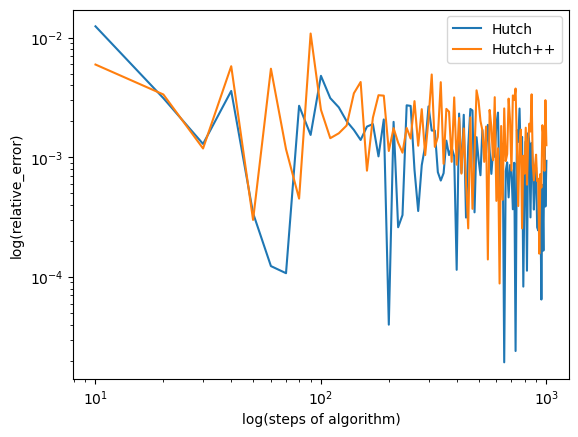

In [83]:
plt.ylabel('log(relative_error)')
plt.xlabel('log(steps of algorithm)')

plt.xscale('log')
plt.yscale('log')

plt.plot(np.arange(10, 1001, 10),trace_err, label = 'Hutch')
plt.plot(np.arange(10, 1001, 10), trace_err_pp, label='Hutch++')

plt.legend()

# Sparse

In [61]:
import scipy
from sklearn.datasets import make_sparse_spd_matrix

In [78]:
randsp = make_sparse_spd_matrix(1000, alpha=0.99)
tr_randsp = np.trace(randsp)
tr_randsp

2514.542810393629

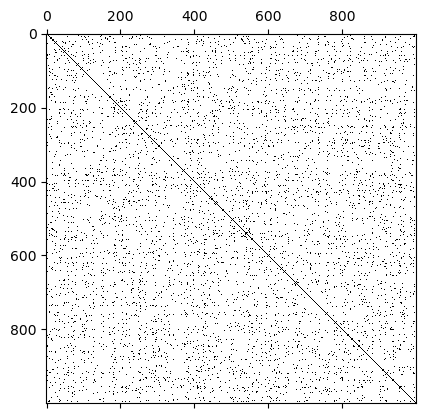

In [79]:
plt.spy(randsp)

In [80]:
trace_err_sp = []
trace_err_sp_pp = []
for m in tqdm(range(10, 1001, 10)):
    tr = hutchinson_rademacher(randsp, m)
    tr_pp = Hutch_pp(randsp, m)
    trace_err_sp.append(np.abs(tr - tr_randsp)/tr_randsp)
    trace_err_sp_pp.append(np.abs(tr_pp - tr_randsp)/tr_randsp)

100%|██████████| 100/100 [00:25<00:00,  3.96it/s]


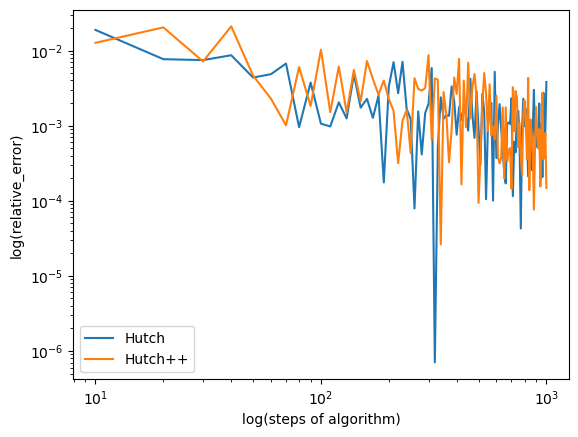

In [82]:
plt.ylabel('log(relative_error)')
plt.xlabel('log(steps of algorithm)')

plt.xscale('log')
plt.yscale('log')


plt.plot(np.arange(10, 1001, 10),trace_err_sp, label = 'Hutch')
plt.plot(np.arange(10, 1001, 10), trace_err_sp_pp, label='Hutch++')

plt.legend()

# $\alpha = 0.5$

In [69]:
eigenvalues = np.linspace(1.0, 1000.0, 1000) ** -0.5
diag = np.diag(eigenvalues)
M = np.random.randn(1000, 1000)
Q, R = np.linalg.qr(M)
rand_decay = Q.T @ diag @ Q
rand_decay_tr = np.trace(rand_decay)
rand_decay_tr


61.80100876524324

In [70]:
trace_err_decay_01 = []
trace_err_decay_01_pp = []
for m in tqdm(range(10, 501, 10)):
    tr = hutchinson_rademacher(rand_decay, m)
    tr_pp = Hutch_pp(rand_decay, m)
    trace_err_decay_01.append(np.abs(tr - rand_decay_tr)/rand_decay_tr)
    trace_err_decay_01_pp.append(np.abs(tr_pp - rand_decay_tr)/rand_decay_tr)

100%|██████████| 50/50 [00:07<00:00,  6.51it/s]


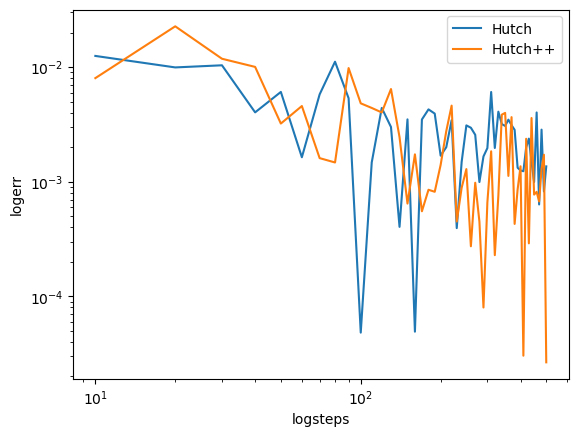

In [71]:
plt.xscale('log')
plt.yscale('log')

plt.ylabel('logerr')
plt.xlabel('logsteps')



plt.plot(np.arange(10, 501, 10),trace_err_decay_01, label = 'Hutch')
plt.plot(np.arange(10, 501, 10), trace_err_decay_01_pp, label='Hutch++')

plt.legend()

# $\alpha = 1$

In [ ]:
eigenvalues = np.linspace(1.0, 1000.0, 1000) ** -1.0
diag = np.diag(eigenvalues)
M = np.random.randn(1000, 1000)
Q, R = np.linalg.qr(M)
rand_decay = Q.T @ diag @ Q
rand_decay_tr = np.trace(rand_decay)
rand_decay_tr


7.485470860550344

In [ ]:
trace_err_decay_1 = []
trace_err_decay_1_pp = []
for m in tqdm(range(10, 501, 10)):
    tr = hutchinson_rademacher(rand_decay, m)
    tr_pp = Hutch_pp(rand_decay, m)
    trace_err_decay_1.append(np.abs(tr - rand_decay_tr)/rand_decay_tr)
    trace_err_decay_1_pp.append(np.abs(tr_pp - rand_decay_tr)/rand_decay_tr)

100%|██████████| 50/50 [00:08<00:00,  6.01it/s]


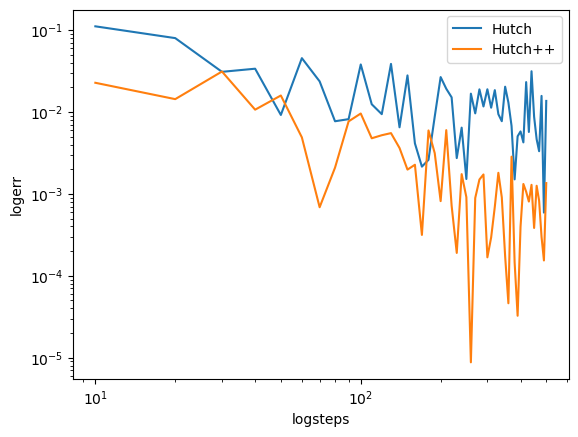

In [ ]:
plt.xscale('log')
plt.yscale('log')

plt.ylabel('logerr')
plt.xlabel('logsteps')


plt.plot(np.arange(10, 501, 10),trace_err_decay_1, label = 'Hutch')
plt.plot(np.arange(10, 501, 10), trace_err_decay_1_pp, label='Hutch++')

plt.legend()

# $\alpha=3$

In [ ]:
eigenvalues = np.linspace(1.0, 1000.0, 1000) ** -3.0
diag = np.diag(eigenvalues)
M = np.random.randn(1000, 1000)
Q, R = np.linalg.qr(M)
rand_decay = Q.T @ diag @ Q
rand_decay_tr = np.trace(rand_decay)
rand_decay_tr


1.2020564036593444

In [ ]:
trace_err_decay_3 = []
trace_err_decay_3_pp = []
for m in tqdm(range(10, 501, 10)):
    tr = hutchinson_rademacher(rand_decay, m)
    tr_pp = Hutch_pp(rand_decay, m)
    trace_err_decay_3.append(np.abs(tr - rand_decay_tr)/rand_decay_tr)
    trace_err_decay_3_pp.append(np.abs(tr_pp - rand_decay_tr)/rand_decay_tr)

100%|██████████| 50/50 [00:07<00:00,  6.38it/s]


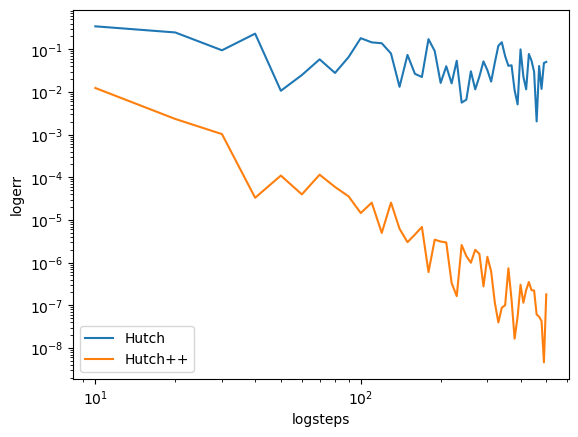

In [ ]:
plt.xscale('log')
plt.yscale('log')

plt.ylabel('logerr')
plt.xlabel('logsteps')


plt.plot(np.arange(10, 501, 10),trace_err_decay_3, label = 'Hutch')
plt.plot(np.arange(10, 501, 10), trace_err_decay_3_pp, label='Hutch++')

plt.legend()

Hutch++ works better than regular one when the eigenvalues decay fast (difference is visible with $\alpha\gtrsim1$). When the decay is slow, there is no difference. Also, for random sparce and dense matrices there is no improvement.

# Problem 3 (Universal adversarial attacks) (18 pts) 

## Intro

Suppose we have some classification model $f: X \to Y$ which takes vector $x \in \mathbb{R^n}$ and output some label $y$. It appears that deep neural networks are valunable to small imperceptible perturbations called adversarial attacks. Formally, an adversarial attack is the verctor $\varepsilon \in \mathbb{R^n}$ that leads to misclassification: $y(x) \neq y(x + \varepsilon)$.

<img src="https://openai.com/content/images/2017/02/adversarial_img_1.png" style="display=block; margin:auto">

However, it was shown that there exist universal adversarial perturbations: $\varepsilon \in \mathbb{R^n}$ that leads to misclassification $y(x) \neq y(x + \varepsilon)$ for most of inputs.

The hypetesis is that perturbation of a hidden layer caused by an attack will propagate further in the network changing predicted label of x.

Let $f_i$ be the output of $i$-s hidden layer, then
$$f_i(x + \varepsilon) - f(x) \approx J_i(x)\varepsilon$$
So, to find attack we need to solve the folliwing optimization problem
$$
\max_{\|\varepsilon\|_p = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_q^q
$$

## Problem discription

+ Obtain fixed point iteration to solve the problem above using first order optimality condition. **(5 pts)**
+ Suppose additionally that $\varepsilon$ should be sparse: $\|\varepsilon\|_0 \leq k$. Correct the algorithm above using additional truncation operator. **(5 pts)**
+ Implement algorithms 1 and 2. Find universal perturbations on CIFAR dataset using random batch of size 64. Report fooling rate depending on hyperparameters **(8 pts)**
$$
\text{FoolingRate} = \frac{1}{N}\sum\limits_{i = 1}^N \mathbb{1}[y(x + \varepsilon) \neq y(x)]
$$



Let $x_1, x_2, ..., x_K$ be vectors from batch of size $K$. Let's take a look at the following matrix:

$$
\Delta_i = \begin{pmatrix}
f_i(x_1+\varepsilon) - f_i(x_1)\\
...\\
f_i(x_K+\varepsilon) - f_i(x_K)
\end{pmatrix}=
\begin{pmatrix}
J_i(x_1)\varepsilon\\
...\\
J_i(x_K)\varepsilon
\end{pmatrix}=
\begin{pmatrix}
J_i(x_1)\\
...\\
J_i(x_K)
\end{pmatrix}\varepsilon=G_i\varepsilon
$$

$$
\|\Delta_i\|_q^q = \sum_{j}\left[\left(\Delta_i\right)_j\right]^q = \sum_{j}\left[f_i(x_j+\varepsilon) - f_i(x_j)\right]^q =\sum_j\sum_k\left|\sum_lJ_i(x_j)_{kl}\varepsilon_l\right|^q=\sum_x\sum_k\left|\sum_lJ_i(x)_{kl}\varepsilon_l\right|^q=\sum_x\|G_i(x)\varepsilon\|_q^q
$$

$$
\max_{\|\varepsilon\|_p=1}\| G_\alpha\varepsilon \|_q = \max_{\varepsilon\neq0} \frac{\| G_\alpha\varepsilon \|_q}{\| \varepsilon \|_p}
$$

We should find the extremum:

$$
\frac{\partial }{\partial \varepsilon_k} \frac{\| G_\alpha\varepsilon \|_q}{\| \varepsilon \|_p} = 0
$$

$$ \frac{\partial }{\partial \varepsilon_k} \| G_\alpha\varepsilon \|_q^q = q \sum_i \left| \sum_j (G_\alpha)_{ij}\varepsilon_j \right| ^{q - 1} \text{sign} \left(\sum_j (G_\alpha)_{ij}\varepsilon_j\right) (G_\alpha)_{ik} = (qG^T_\alpha S_q(G_\alpha\varepsilon))_k$$

$S_q(x)$ is vector, $S_q(x)_i = \text{sign}(x_i)|x_i|^q$

$$
\frac{\partial}{\partial \varepsilon}\|\varepsilon\|_p = \|\varepsilon\|_p^{1-p}S_p(\varepsilon)
$$

Subsituting it all into the equation, we get:

$$
\|\varepsilon\|_p^p\|G_\alpha\varepsilon\|_q^{-q}G^T_\alpha S_q(G_\alpha\varepsilon)=S_p(\varepsilon)
$$

If we take $r = \frac{p}{p-1}$

$$
S_{r}(S_p(\varepsilon)) = |\varepsilon|^{(r-1)(p-1)}\text{sign}(\varepsilon) = |\varepsilon|\text{sign}(\varepsilon) = \varepsilon
$$

So, applying $S_r$ to both sides of equation, we get

$$
\varepsilon = \|\varepsilon\|_{p}^{p(r-1)}\|G_\alpha\varepsilon\|_q^{-q(r - 1)}S_{r}(G^T_\alpha S_{q}(G_\alpha\varepsilon))
$$

To get the optimal $\varepsilon$, we should make the following steps: compute $G_i$ for $x$ in batch, make some initial guess $\varepsilon_0$, normalize it, then $\varepsilon = \|\varepsilon\|_{p}^{p(r-1)}\|G_\alpha\varepsilon\|_q^{-q(r - 1)}S_{r}(G^T_\alpha S_{q}(G_\alpha\varepsilon))$, normalize it and so on.

In [4]:
import torch
import torch.nn as nn
import requests

In [5]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None


def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [6]:
class CifarNet(nn.Module):
    def __init__(self):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3)

        self.pool = nn.MaxPool2d(2, 2)

        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(3200, 256)
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(-1, 3200)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [7]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

file_id = "1qrNvr3eLYjvbkVg5jY2sYA2rqK9XkTXs"
download_file_from_google_drive(file_id, "./cifar_checkpoint.pth")

model = CifarNet().to(device)
model.load_state_dict(torch.load("./cifar_checkpoint.pth", map_location="cpu"))

<All keys matched successfully>

# Problem 4 (Image restoration) (23 pts) 

Image restoration is the task where we need to eliminate blurring and some random noise to get ideal image. Practically, images obtained in real life could be represented in following way:

$$g = f * h + n$$

where $g$ - obtained image of size $(N,N)$, $h$ - blur kernel of size $(3,3)$, $n$ - an additive zero-mean Gaussian white noise, and $f$ - ideal image (deblurred and denoised). In our work we will use gaussian blur kernel with window size 3:

$$h = \frac{1}{16}\begin{pmatrix}1 & 2 & 1\\ 2 & 4 & 2\\ 1 & 2 & 1\end{pmatrix}$$

Here $f*h$ is a 2-d convolution of ideal image with blur kernel, which could be rewritten in matrix format:

$$f * h = H \mathrm{vec}(f)$$

where $H$ - block Toeplitz with Toeplitz blocks matrix which corresponds to 2-d convolution with kernel $h$, $\mathrm{vec}(\cdot)$ - operation of vectorization.

So, let us write the task of finding $f$ as optimization problem:

$$\min\limits_{f,u} \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}}$$
where $\|u\|_{\mathrm{TV}} = \sum\limits_{1\leq j,k\leq N}\|\nabla u_{j,k}\|_2 = \sum\limits_{1\leq j,k\leq N}\sqrt{(u_{j+1,k}-u_{j,k})^2 + (u_{j,k+1}-u_{j,k})^2}$ here we calculate gradients (pixel differences) along **x** and **y** image dimensions.

One can notice that problem could be splitted on two:

$$\min\limits_{u}\min\limits_f \{\|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2\} + \alpha_2\|u\|_{\mathrm{TV}}$$

To find the solution we will use iterative method:

$$\begin{cases}
f^{(i)} = \arg\min\limits_f \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u^{(i-1)})\|_2^2 & (a)\\
u^{(i)} = \arg\min\limits_u \alpha_1\|\mathrm{vec}(f^{(i)}-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}} & (b)
\end{cases}$$

Taking matrix derivative over the minimization functional in subproblem **(a)** we get the system:

$$(H^TH + \alpha_1I)\mathrm{vec}(f) = H^T\mathrm{vec}(g)+\alpha_1\mathrm{vec}(u^{(i-1)})$$

This system can be solved by conjugate gradient method. Also, taking into account that $H$ is block Toeplitz with Toeplitz blocks (BTTB), we can make fast matrix by vector multiplication.

The subproblem **(b)** could be solved by using any kind of solver of your choice.

**So, your task is to:**

1. Implement creation and fast matrix by vector multiplication for matrix $H$ **(6 pts)**
2. Implement solver for subproblem **(a)** based on conjugate gradient descent using fast matrix by vector multiplication for $H$. **(8 pts)**
3. Implement some solver for subproblem **(b)** **(3 pts)**
4. Implement iterative solver for the total problem using solvers for subproblems **(a)** and **(b)** **(3 pts)**
5. Blur (use defined blurring kernel) given image and add gaussian noise with zero mean and some variance (up to you). Try to restore the image, compare the result with the original one. Make a conclusion. **(3 pts)**


In [1]:
from PIL import Image, ImageOps
import numpy as np
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from scipy import misc
import imageio

In [2]:
!wget --no-check-certificate \
    "https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true" \
    -O "/lena.png"

zsh:1: command not found: wget


Sorry, my computer refused to download it with wget, so I downloaded it manually

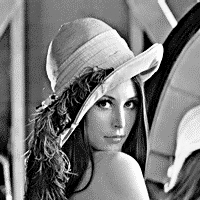

In [3]:
orig_image = ImageOps.grayscale(Image.open("lena.png"))
orig_image

In [4]:
def make_toeplitz(h):
    imsize = 200
    H = np.zeros((2 * imsize - 1, 2 * imsize - 1))
    H[0, 0] = h[1, 1]
    H[0, 1] = h[1, 0]
    H[0, -1] = h[1, 2]

    H[1, 0] = h[0, 1]
    H[1, 1] = h[0, 0]
    H[1, -1] = h[0, 2]

    H[-1, 0] = h[2, 1]
    H[-1, 1] = h[2, 0]
    H[-1, -1] = h[2, 2]
    
    return H


def fastvec(h, x):
    H = make_toeplitz(h)
    size = 200
    y = np.pad(x, ((0, size - 1), (0, size - 1)), constant_values=0)
    return np.fft.ifft2(np.fft.fft2(H) * np.fft.fft2(y))[:size, :size].real

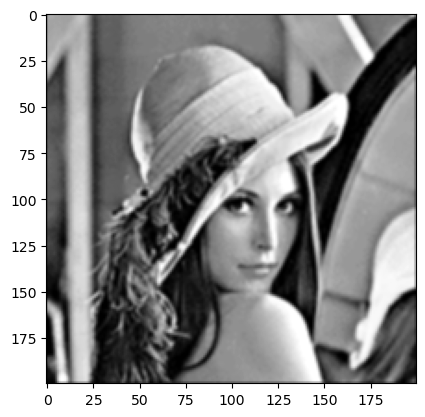

In [5]:
h = np.array([[1,2,1],[2,4,2], [1, 2, 1]]) / 16
new_lena = fastvec(h, np.array(orig_image))
plt.imshow(new_lena, cmap='gray')

1.4210854715202004e-13

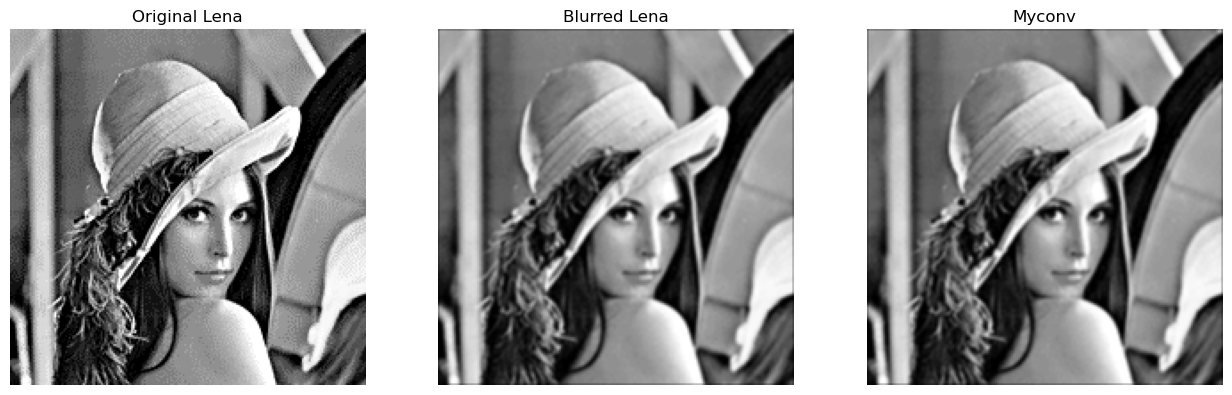

In [6]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from scipy import misc
import imageio

filter_size = 3
filter_blur = np.array([[1,2,1],[2,4,2], [1, 2, 1]]) / 16
#lena = misc.face()
#lena = lena[:, :, 0]
blurred = signal.convolve2d(orig_image, filter_blur, boundary='fill', mode='same')

fig, ax = plt.subplots(1, 3, figsize=(13, 4))
ax[0].imshow(orig_image, cmap='gray')
ax[0].set_title('Original Lena')
ax[0].axis('off')
ax[1].imshow(blurred, cmap='gray')
ax[1].set_title('Blurred Lena')
ax[1].axis('off')
ax[2].imshow(new_lena, cmap='gray')
ax[2].set_title('Myconv')
ax[2].axis('off')
fig.tight_layout()

np.abs((blurred - new_lena)).max()

In [10]:
noisy = new_lena + np.random.normal(0, 5, size=(200, 200))

(-0.5, 199.5, 199.5, -0.5)

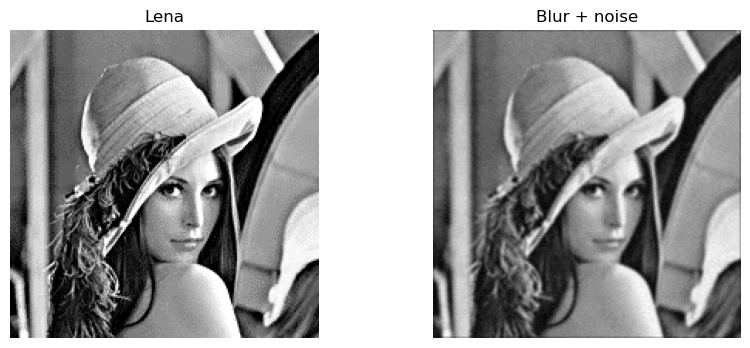

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(orig_image, cmap='gray')
ax[0].set_title('Lena')
ax[0].axis('off')
ax[1].imshow(noisy, cmap='gray')
ax[1].set_title('Blur + noise')
ax[1].axis('off')

In [12]:
def conj_grad(h, alpha1, g, u, tol):
    
    x = np.zeros((200, 200))
    r0 = fastvec(h, g) + alpha1 * u
    p = r0.copy()
    r = r0.copy()
    r_norm = (r * r).sum()

    for _ in range(tol):
        alpha = (r * r).sum() / (p * (fastvec(h, fastvec(h, p)) + alpha1 * p)).sum()
        x = x + alpha * p
        r = r - alpha * (fastvec(h, fastvec(h, p)) + alpha1 * p)

        beta = (r * r).sum() / r_norm
        p = r + beta * p
        r_norm = (r * r).sum()
    return x

    


In [13]:
import cvxpy as cp
from tqdm import tqdm

In [14]:
def get_u(f, alpha1, alpha2):
    u = cp.Variable(f.shape)
    objective = cp.Minimize(alpha1*cp.sum_squares(f-u)+alpha2*cp.tv(u))
    prob = cp.Problem(objective)
    value = prob.solve()
    return u.value

In [15]:
def solve_all(image, alpha1, alpha2, tol, iter, kernel):
    u = np.random.rand(200, 200)
    for i in tqdm(range(iter)):
        f = conj_grad(kernel, alpha1, image, u, tol)
        u = get_u(f, alpha1, alpha2)
    return f

In [16]:
kernel = np.array([[1,2,1],[2,4,2], [1, 2, 1]]) / 16

In [19]:
deblurred = solve_all(noisy.astype(float), 0.2, 0.3, 120, 10, kernel)

100%|██████████| 10/10 [03:27<00:00, 20.80s/it]


(-0.5, 199.5, 199.5, -0.5)

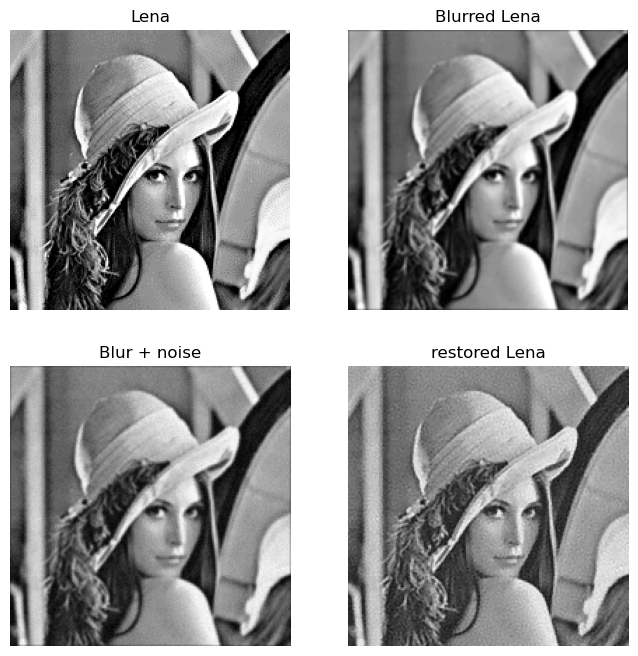

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(orig_image, cmap='gray')
ax[0, 0].set_title('Lena')
ax[0, 0].axis('off')
ax[0, 1].imshow(new_lena, cmap='gray')
ax[0, 1].set_title('Blurred Lena')
ax[0, 1].axis('off')
ax[1, 0].imshow(noisy, cmap='gray')
ax[1, 0].set_title('Blur + noise')
ax[1, 0].axis('off')
ax[1, 1].imshow(deblurred, cmap='gray')
ax[1, 1].set_title('restored Lena')
ax[1, 1].axis('off')

The result is very good, the image is sharper. It is still a bit noisy (initial image is noisy too), but better result may be achieved by variying the parameters $\alpha_1, \alpha_2$ and number of iterations.